# Emotion Detection of Text 

1. Text Classification 
2. Sentiment Analysis 

In [1]:
#loading packages 
import pandas as pd
import numpy as np

In [2]:
#loading data viz packages 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Load Text cleaning 
import neattext.functions as nfx

In [4]:
#load Dataset 
df = pd.read_csv("D:\Spoonshot Assessment\intern_assignment\data.csv")

In [5]:
#Preview
df.head()

,text,sentiment
0,@angelemotion yayyy for new videos by amazing ...,happiness
1,Surgery when I wake up,neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise
3,Just look @ this hellacious desk...good grief ...,hate
4,@ModelTheany tee we beefin....what was u supp...,surprise


In [6]:
#Shape
df.shape

(32000, 2)

In [7]:
#DataTypes
df.dtypes

text         object
sentiment    object
dtype: object

In [8]:
#Checking for missing values
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [9]:
#Value counts of emotions
df['sentiment'].value_counts()

neutral       6910
worry         6767
happiness     4167
sadness       4132
love          3074
surprise      1750
fun           1421
relief        1221
hate          1058
empty          662
enthusiasm     607
boredom        143
anger           88
Name: sentiment, dtype: int64

<AxesSubplot:>

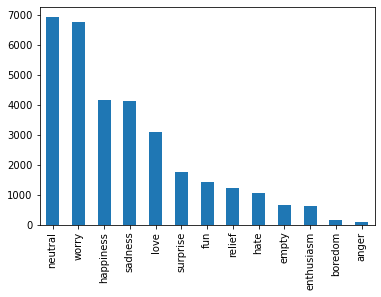

In [10]:
df['sentiment'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

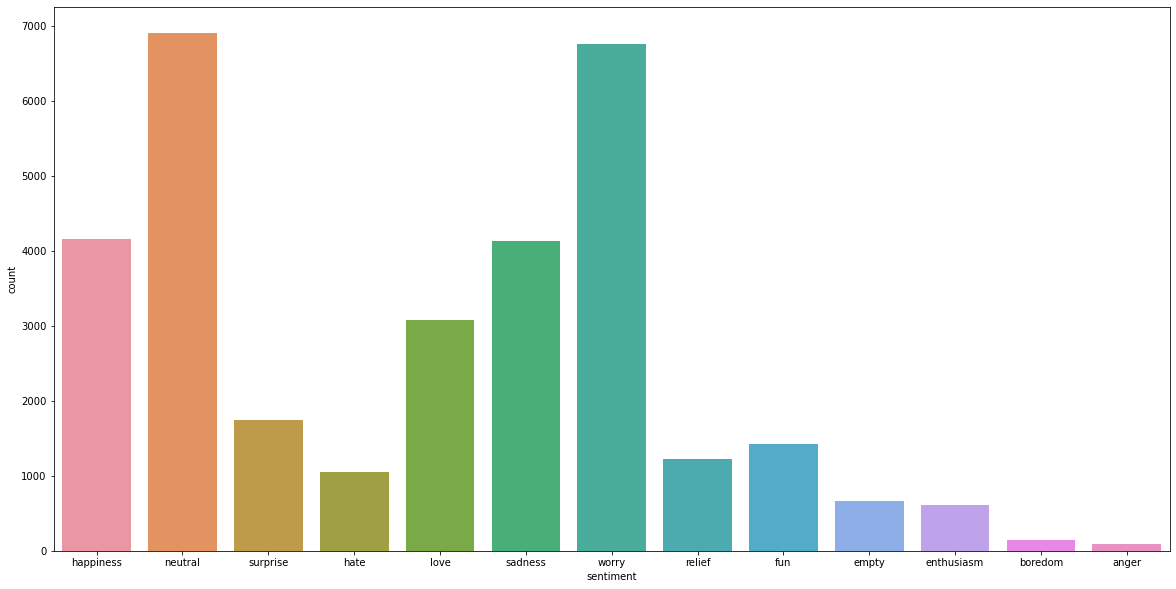

In [11]:
#Using Seaborn to plot
plt.figure(figsize=(20,10))
sns.countplot(x='sentiment',data=df)
plt.show

# Exploratory Data Analysis(EDA)
+ Text Cleaning
+ Sentiment Analysis
+ Keyword Extraction 
    - Keywords for each emotion
    - Wordcloud


In [12]:
#Sentiment Analysis 
from textblob import TextBlob

In [13]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity 
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result 

In [14]:
#Checking text function
get_sentiment("I am a coder")

'Neutral'

In [15]:
df['Emotion'] = df['text'].apply(get_sentiment)

In [16]:
df.head()

,text,sentiment,Emotion
0,@angelemotion yayyy for new videos by amazing ...,happiness,Positive
1,Surgery when I wake up,neutral,Neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise,Neutral
3,Just look @ this hellacious desk...good grief ...,hate,Negative
4,@ModelTheany tee we beefin....what was u supp...,surprise,Neutral


In [17]:
#Compare our emotion vs sentiment
df.groupby(['sentiment','Emotion']).size()

sentiment   Emotion 
anger       Negative      27
            Neutral       33
            Positive      28
boredom     Negative      67
            Neutral       42
            Positive      34
empty       Negative     142
            Neutral      326
            Positive     194
enthusiasm  Negative      82
            Neutral      203
            Positive     322
fun         Negative     160
            Neutral      380
            Positive     881
happiness   Negative     270
            Neutral      993
            Positive    2904
hate        Negative     552
            Neutral      294
            Positive     212
love        Negative     173
            Neutral      543
            Positive    2358
neutral     Negative     944
            Neutral     3546
            Positive    2420
relief      Negative     174
            Neutral      374
            Positive     673
sadness     Negative    1508
            Neutral     1351
            Positive    1273
surprise    Negative  

<AxesSubplot:xlabel='sentiment,Emotion'>

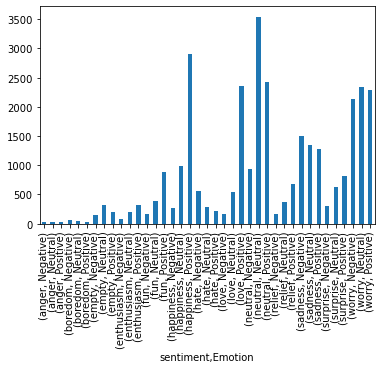

In [18]:
#plotting matplotlib of comparision 
df.groupby(['sentiment','Emotion']).size().plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


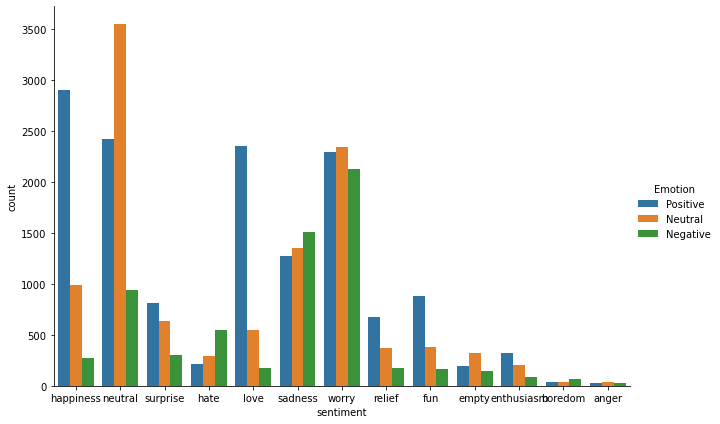

In [19]:
#Using Seaborn
sns.factorplot
sns.catplot
sns.factorplot(x='sentiment',hue='Emotion',data=df,kind='count',size=6,aspect=1.5)

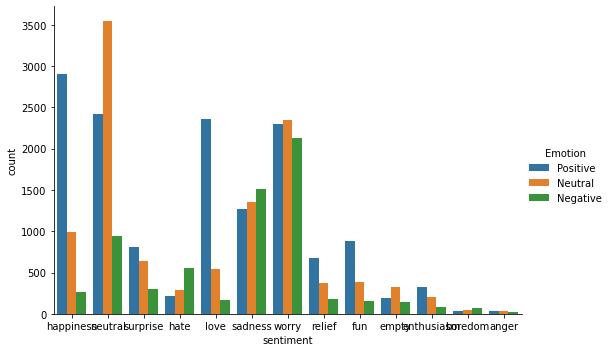

In [20]:
sns.catplot(x='sentiment',hue='Emotion',data=df,kind='count',aspect=1.5)

## Text Cleaning 
+ Remove noise
    - Stopwords
    - Special characters
    - Punctuations
    - Emojis

In [21]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
df['Clean_Text'] = df['text'].apply(nfx.remove_stopwords)

In [23]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [24]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [25]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_urls)

In [26]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emails)

In [27]:
df[['text','Clean_Text']]

,text,Clean_Text
0,@angelemotion yayyy for new videos by amazing ...,yayyy new videos amazing people
1,Surgery when I wake up,Surgery wake
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,WAY MAN like 21 year olds
3,Just look @ this hellacious desk...good grief ...,look @ hellacious deskgood grief http://shortt...
4,@ModelTheany tee we beefin....what was u supp...,tee beefinwhat u supposed leavin
...,...,...
31995,as any1 been up all night like me and now the ...,any1 night like birds keeping awake
31996,"Not going to Suffolk tomorrow. However, now ...",going Suffolk tomorrow However MB amp planning...
31997,i really wanna play....,wanna play
31998,"@DavidArchie Hey David, I'm wondering if you r...",Hey David Im wondering received letter song ...


## Keyword Extraction 
+ Extract most commonest words per class of emotion

In [28]:
from collections import Counter

In [29]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [30]:
#List of sentiments
sentiment_list = df['sentiment'].unique().tolist()

In [31]:
sentiment_list

['happiness',
 'neutral',
 'surprise',
 'hate',
 'love',
 'sadness',
 'worry',
 'relief',
 'fun',
 'empty',
 'enthusiasm',
 'boredom',
 'anger']

In [32]:
happiness_list = df[df['sentiment'] == 'happiness']['Clean_Text'].tolist()

In [33]:
#Happiness Document 
happiness_docx = ' '.join(happiness_list)

In [34]:
happiness_docx

'  yayyy new videos amazing people 10th 2 months=] going watch davids yey   Oh wow Thanks info Mariana ~ Photography Cassones 2009 Feature http://bitly/E2bjm  Thanks Goooood beer tiiiimes   awesome Ill look it favorite relaxing songs wake to: http://tinyurlcom/c8fr3e Good morning http://twitpiccom/4w855 Operation Happy Mom success NITE PEOPLES going hometown excited Thames Street IM GONNA ORIGINAL THAMES RIVER BITCH ohhhh Looking forward Sunday b/c weather warm sunny getting ready lay pool   KNEW that   haha told you important Oh yeah Radio1 playing Earth Wind Fire     great pichave upload pix tomoIve laptop tonight picture burn  taylor swift great song   thanks havin overrr Woo hoo party here gonna fun Ive brush teeth im eating Chocolates right haha sharing @ BeardBurk: optimistic 1st TY follow back 2nd  grrr dont cuz messes able follow u want ur 2000+ also Liptons Sparkling Green Tea gross   Wow   constantly ranting love Genghis Grill too there Colorado wishing happy monday wonderful

In [35]:
#Extracting keywords
keyword_happiness = extract_keywords(happiness_docx)

In [36]:
keyword_happiness

{'day': 371,
 'good': 336,
 'Im': 261,
 'great': 202,
 'today': 199,
 'like': 185,
 'got': 165,
 'happy': 164,
 'fun': 161,
 'time': 151,
 'night': 150,
 'im': 147,
 'new': 141,
 'lol': 141,
 'haha': 138,
 'u': 135,
 'morning': 133,
 'amp': 133,
 'going': 131,
 'Happy': 127,
 'know': 127,
 'work': 125,
 'thanks': 121,
 'love': 120,
 'Thanks': 117,
 'nice': 111,
 'it': 110,
 'Good': 106,
 'you': 106,
 'Day': 104,
 'awesome': 99,
 'home': 99,
 'think': 96,
 '2': 94,
 'cant': 91,
 'tonight': 84,
 'hope': 81,
 'wait': 78,
 'week': 75,
 'weekend': 73,
 'Mothers': 73,
 'best': 69,
 'LOL': 69,
 'mothers': 68,
 'want': 67,
 'better': 66,
 'excited': 65,
 'cool': 65,
 'tomorrow': 62,
 'too': 61}

In [37]:
#Plotting 
def plot_most_common_words(mydict,sentiment_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(sentiment_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

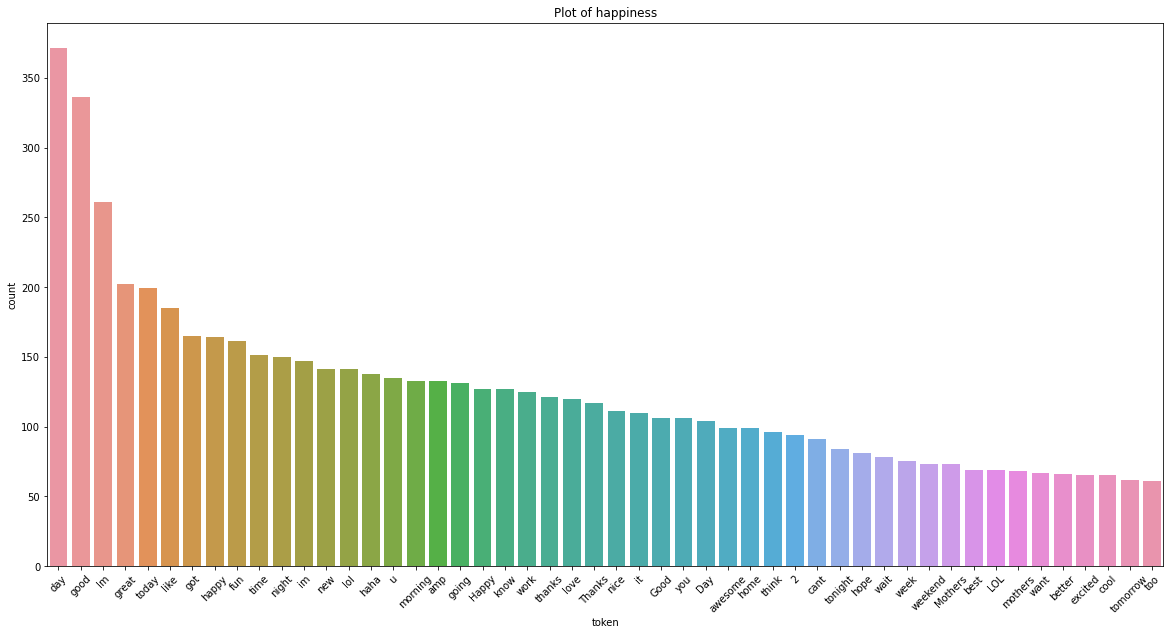

In [38]:
plot_most_common_words(keyword_happiness,"happiness")

In [39]:
surprise_list = df[df['sentiment'] == 'surprise']['Clean_Text'].tolist()
#Document 
surprise_docx = ' '.join(surprise_list)
#Extract Keywords
keyword_surprise = extract_keywords(surprise_docx)

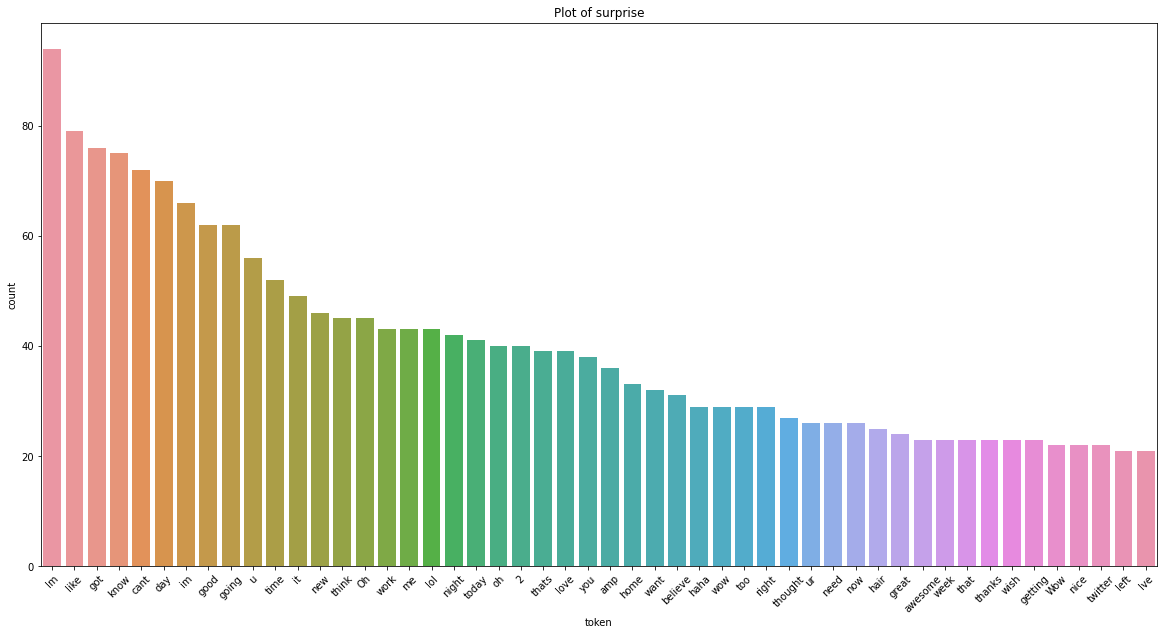

In [40]:
plot_most_common_words(keyword_surprise,"surprise")

## Machine learning 
+ Naive Bayes
+ Logistic Regression
+ KNN
+ Decision Tree

In [41]:
#load Machine Learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [42]:
#Split our dataset
from sklearn.model_selection import train_test_split

### Build features from our test

In [43]:
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

In [44]:
Xfeatures

0                          yayyy new videos amazing people
1                                             Surgery wake
2                                WAY MAN like 21 year olds
3        look @ hellacious deskgood grief http://shortt...
4                         tee beefinwhat u supposed leavin
                               ...                        
31995                  any1 night like birds keeping awake
31996    going Suffolk tomorrow However MB amp planning...
31997                                           wanna play
31998      Hey David Im wondering received letter song ...
31999    watched Xmen origins: wolverine totally loved ...
Name: Clean_Text, Length: 32000, dtype: object

In [45]:
#Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [46]:
#Get features by name
cv.get_feature_names()

['00',
 '000',
 '002',
 '00am',
 '00pm',
 '01',
 '010',
 '02',
 '023',
 '0255',
 '02mxjj',
 '03',
 '04',
 '04182012154',
 '05',
 '050',
 '05ixbj',
 '06',
 '0600',
 '06am',
 '07',
 '079ï',
 '07am',
 '07i',
 '07jzs',
 '07k6e',
 '07k6x',
 '07kbq',
 '07kjr',
 '07xoh',
 '07yez',
 '08',
 '080509',
 '080809',
 '08kaifj',
 '09',
 '097dfj',
 '0a7v3j',
 '0egwanj',
 '0f',
 '0gmunj',
 '0l2tsj',
 '0ltrdaj',
 '0mqko',
 '0o',
 '0quot',
 '0rpm',
 '0s',
 '0t2b6j',
 '0ut',
 '0wvnpj',
 '0xhu5j',
 '0xoxij',
 '0zr2jqj',
 '0zywwj',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100greatestgames',
 '100th',
 '100word',
 '101',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '102',
 '1027',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '1034415',
 '104',
 '104m6wj',
 '105',
 '1052x1',
 '1057',
 '106',
 '1073',
 '1075',
 '108',
 '109',
 '1095',
 '10am',
 '10and',
 '10c',
 '10dolla',
 '10gb',
 '10hour',
 '10jaffa',
 '10jsepj',
 '10k',
 '10m',
 '10min',
 '10min

In [47]:
#Split dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

### Build our model

In [48]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [49]:
#Accuracy 
#method
nv_model.score(X_test,y_test)

0.3104166666666667

In [50]:
#Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [51]:
y_pred_for_nv

array(['neutral', 'neutral', 'worry', ..., 'sadness', 'worry', 'worry'],
      dtype='<U10')

## Make a single Prediction
+ Vectorized our text
+ Applied our model 

In [52]:
sample_text = ["I love coding"]

In [53]:
vect = cv.transform(sample_text).toarray()

In [54]:
#Make prediction
nv_model.predict(vect)

array(['love'], dtype='<U10')

In [55]:
#Check for the prediction probability(Percentage)/Confidence score
nv_model.predict_proba(vect)

array([[1.11107548e-04, 1.70580346e-04, 2.98802065e-03, 2.53626923e-03,
        2.19374656e-02, 1.00946776e-01, 3.35880841e-03, 4.25767437e-01,
        1.63050217e-01, 1.27858477e-02, 6.54409859e-02, 2.32995676e-02,
        1.77606917e-01]])

In [56]:
#Get all classes for our model
nv_model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [57]:
np.max(nv_model.predict_proba(vect))

0.4257674367868487

In [58]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [59]:
predict_emotion(sample_text,nv_model)

Prediction:love, Prediction Score:0.4257674367868487


{'anger': 0.00011110754759567821,
 'boredom': 0.00017058034561305956,
 'empty': 0.0029880206544534165,
 'enthusiasm': 0.0025362692325022,
 'fun': 0.02193746564236567,
 'happiness': 0.10094677566073386,
 'hate': 0.003358808414794764,
 'love': 0.4257674367868487,
 'neutral': 0.16305021710551143,
 'relief': 0.012785847738939171,
 'sadness': 0.06544098589575412,
 'surprise': 0.023299567601199618,
 'worry': 0.17760691737368894}

In [60]:
predict_emotion(["He hates running all day"],nv_model)

Prediction:sadness, Prediction Score:0.39330603437888156


{'anger': 1.2231181367699192e-06,
 'boredom': 4.572376102153649e-06,
 'empty': 2.9720558876956714e-05,
 'enthusiasm': 0.00021150760690274352,
 'fun': 0.009867463420593673,
 'happiness': 0.028705379220528918,
 'hate': 0.006962268108460733,
 'love': 0.08369580367209412,
 'neutral': 0.1756159941609437,
 'relief': 0.0013185368611518112,
 'sadness': 0.39330603437888156,
 'surprise': 0.0086177075705413,
 'worry': 0.2916637889467884}

### Model Evaluation

In [61]:
#Classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        24
     boredom       0.00      0.00      0.00        43
       empty       0.20      0.01      0.01       164
  enthusiasm       0.00      0.00      0.00       186
         fun       0.17      0.00      0.01       438
   happiness       0.30      0.32      0.31      1208
        hate       0.18      0.01      0.01       322
        love       0.46      0.29      0.36       943
     neutral       0.33      0.39      0.36      2120
      relief       0.00      0.00      0.00       388
     sadness       0.27      0.15      0.19      1206
    surprise       0.11      0.00      0.01       525
       worry       0.29      0.64      0.40      2033

    accuracy                           0.31      9600
   macro avg       0.18      0.14      0.13      9600
weighted avg       0.27      0.31      0.26      9600



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#Confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    9,    0,    1,
           0,   14],
       [   0,    0,    0,    0,    0,    1,    0,    0,    8,    0,    7,
           0,   27],
       [   0,    0,    1,    0,    0,   13,    1,    2,   68,    0,    9,
           1,   69],
       [   0,    0,    0,    0,    0,   26,    0,    7,   59,    0,   17,
           1,   76],
       [   0,    0,    0,    0,    2,  110,    0,   20,  122,    0,   17,
           1,  166],
       [   0,    0,    2,    1,    0,  386,    0,   87,  329,    1,   42,
           0,  360],
       [   0,    0,    0,    0,    0,   15,    2,    9,   59,    1,   52,
           1,  183],
       [   0,    0,    0,    0,    0,  214,    0,  275,  166,    0,   27,
           2,  259],
       [   0,    0,    2,    0,    5,  231,    3,   84,  825,    1,   99,
           5,  865],
       [   0,    0,    0,    0,    0,   60,    0,   17,  123,    0,   17,
           0,  171],
       [   0,    0,    0,    0,    2,   56,    3, 

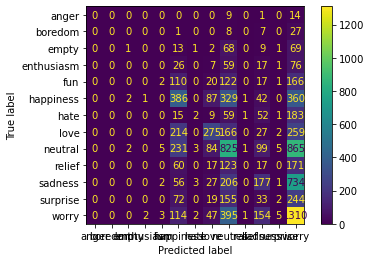

In [63]:
#Plot of confusion matrix
plot_confusion_matrix(nv_model,X_test,y_test)

### Save Model

In [64]:
import joblib

In [65]:
model_file = open("emotion_classifier_nv_model_11907868.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

### Logistic Regression

In [66]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
#Accuracy
lr_model.score(X_test,y_test)

0.33135416666666667

In [68]:
#Single Predict
predict_emotion(sample_text,lr_model)

Prediction:love, Prediction Score:0.5186578946084238


{'anger': 0.0018534088849551202,
 'boredom': 0.0015897201179852693,
 'empty': 0.017880128971878285,
 'enthusiasm': 0.009281069776993712,
 'fun': 0.025285539488939454,
 'happiness': 0.07789761837751964,
 'hate': 0.0066665270610166815,
 'love': 0.5186578946084238,
 'neutral': 0.13885728379792994,
 'relief': 0.026585186020194353,
 'sadness': 0.04981683633317237,
 'surprise': 0.035766824007175346,
 'worry': 0.08986196255381607}

# Thank You !!!